# Applying a Entailemnt Internalization

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import joypy
import warnings
from lr.plot.myplots import plot_error_bar
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# load data

In [2]:
result_path = "results/snli_lr_Tfidf_ent_int_60.csv"
# result_path =  "results/t.csv"


# ent_result_path = "results/snli_lr_Tfidf_ent_int_ent_25_25.csv"
# neutral_result_path = "results/snli_lr_Tfidf_ent_int_neutral_25_25.csv"
# contra_result_path = "results/snli_lr_Tfidf_ent_int_contra_25_25.csv"
result = pd.read_csv(result_path)

In [3]:
print("shape = {}\n".format(result.shape))
# print("total simulation time = {:.3f} minutes\n".format(result.training_time.sum() / 60 ))
display(HTML(result.head(3).to_html()))

shape = (1680, 12)



,pcts,acc,acct,acc_minus_acct,t1,C,D,E,F,t2,pos_trans_rate,neg_trans_rate
0,0.01,0.617862,0.616237,0.001626,0.502440,5566,515,499,3262,0.252465,0.492110,0.507890
1,0.01,0.614712,0.615830,-0.001118,-0.372277,5619,431,442,3350,0.138603,0.506300,0.493700
2,0.01,0.613696,0.613595,0.000102,0.033387,5591,449,448,3354,0.001115,0.499443,0.500557


## Accuracy

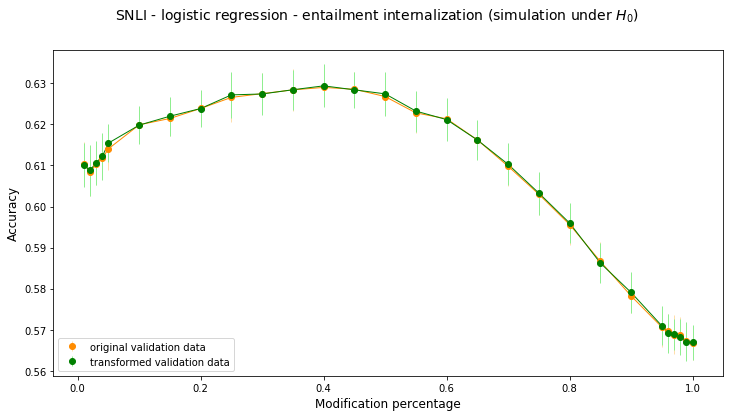

In [4]:
title = r'SNLI - logistic regression - entailment internalization (simulation under $H_0$)'

acc = result.groupby("pcts").mean()[["acc"]].values.flatten()
e_acc = result.groupby("pcts").std()[["acc"]].values.flatten()
x = result.groupby("pcts").mean().index 

acc_t = result.groupby("pcts").mean()[["acct"]].values.flatten()
e_acc_t = result.groupby("pcts").std()[["acct"]].values.flatten()


fig, ax = plt.subplots(1, 1, figsize=(12,6))

plot_error_bar(x=x,
               y=acc,
               yerr=e_acc,
               color1="darkorange",
               color2='navajowhite',
               label="original validation data")
plot_error_bar(x=x,
               y=acc_t,
               yerr=e_acc_t,
               color1="green",
               color2='lightgreen',
               label="transformed validation data")
fig.suptitle(title, fontsize=14);
ax.set_xlabel("Modification percentage", fontsize=12);
ax.set_ylabel("Accuracy", fontsize=12);
plt.legend(loc="lower left");

# Paired t-test (simulation)

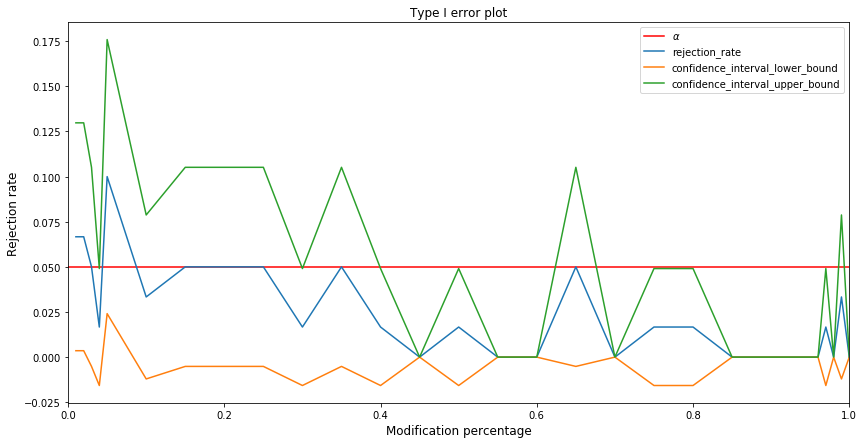

In [5]:
alpha_t_test = 0.05
alpha_ci = 0.05 
z_alpha_2 =  scipy.stats.norm.ppf(1  - (alpha_ci/2))
B = result.pcts.value_counts().unique()
assert B.shape[0] == 1
B = B[0]

result.loc[:, "p_values"]  = 1 - scipy.stats.chi2.cdf(result.t1 ** 2, df=1)
result.loc[:, "paired_t_test"] = (result.p_values < alpha_t_test).astype(int)
rejection_rate = result.groupby("pcts").mean().paired_t_test
rejection_rate.name = "rejection_rate"
std = z_alpha_2 * np.sqrt((rejection_rate * (1 - rejection_rate))/ B)

l = rejection_rate - std
l.name = "confidence_interval_lower_bound"
u = rejection_rate + std
u.name = "confidence_interval_upper_bound"
df_rr = pd.DataFrame([rejection_rate, l,u]).transpose()




fig, ax = plt.subplots(1,1,figsize=(14,7))
plt.axhline(y=alpha_t_test, color='r', linestyle='-', label=r"$\alpha$")
df_rr.plot(ax=ax, title="Type I error plot");
ax.set_xlabel("Modification percentage", fontsize=12);
ax.set_ylabel(r"Rejection rate", fontsize=12);
plt.legend(loc="best");

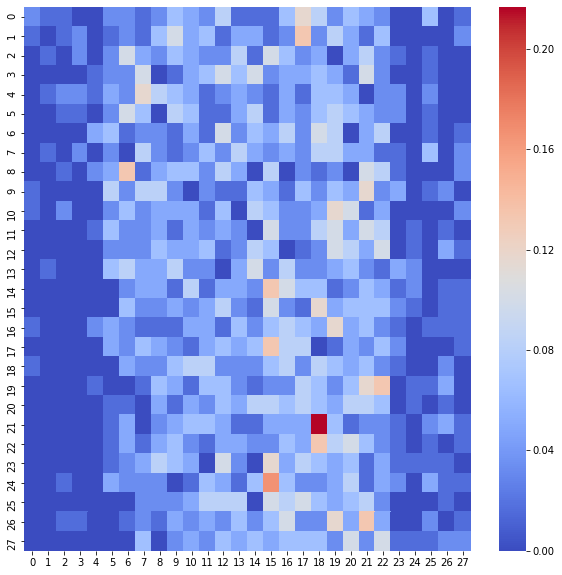

In [6]:
pcts = result.pcts.unique()
dists = []
df = result.set_index("pcts")

for p in pcts:
    dists.append(np.histogram(df.loc[p].p_values, bins=[0] + list(pcts))[0] / B)
    
dists = np.array(dists)

import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10));
sns.heatmap(dists,cmap='coolwarm', cbar=True, annot=False);

## Test statistic

In [7]:
# z_alpha_2 =  scipy.stats.norm.ppf(1  - (alpha/2))
# t1_mean = result.groupby("pcts").mean()[["t1"]].values.flatten()
# e_t1 = result.groupby("pcts").std()[["t1"]].values.flatten()
# x = result.groupby("pcts").mean().index 

# fig, ax = plt.subplots(1, 1, figsize=(14,7))

# plot_error_bar(x=x,
#                y=t1_mean,
#                yerr=e_t1,
#                color1="k",
#                color2='k',
#                label="paired t-test statistic")

# fig.suptitle(title, fontsize=14);
# plt.axhline(y=z_alpha_2, color='r', linestyle='-')
# plt.axhline(y=-z_alpha_2, color='r', linestyle='-')
# ax.set_xlabel("Modification percentage", fontsize=12);
# ax.set_ylabel("test statistic", fontsize=12);
# plt.legend(loc="lower left");

## P-values

## Interval analysis

### Comparing 2 simulations

In [8]:
# result_path = "results/snli_lr_Tfidf_ent_int_10.csv"
# result2 = pd.read_csv(result_path)

# result2.loc[:, "p_values"] = result2.t1.map(p_normal)
# result_.loc[:, "reject_h0_60"] = (result_.p_values < alpha).astype(int)

# result2.loc[:, "reject_h0_10"] = (result2.p_values < alpha).astype(int)

# fig, ax = plt.subplots(1,1,figsize=(14,7))
# plt.axhline(y=alpha, color='r', linestyle='-', label=r"$\alpha$")
# result2.groupby("pcts").mean().reject_h0_10.plot(ax=ax, title="Type I error plot");
# result_.groupby("pcts").mean().reject_h0_60.plot(ax=ax, title="Type I error plot");
# ax.set_xlabel("Modification percentage", fontsize=12);
# ax.set_ylabel(r"Average times that $H_0$ is rejected", fontsize=12);
# plt.legend(loc="best");

In [9]:
# fig, ax = plt.subplots(1,1,figsize=(10,10))
# ax.set_xlabel("Modification percentage", fontsize=12);
# ax.set_ylabel(r"Average times that $H_0$ is rejected", fontsize=12);
# joypy.joyplot(result_, by="pcts", column="p_values",ax=ax);
# plt.axvline(x=alpha, color='r', linestyle='-');
# # plt.savefig("t.png")

In [10]:
# bad = result_.groupby("pcts").mean().reject_h0[result_.groupby("pcts").mean().reject_h0 > alpha]
# result_bad = result_[result_['pcts'].isin(bad.index.unique())]
# fig, ax = plt.subplots(1,1,figsize=(8,8))
# joypy.joyplot(result_bad, by="pcts", column="p_values",ax=ax, hist=True);
# plt.axvline(x=alpha, color='r', linestyle='-');